In [1]:
%matplotlib inline
import os,gc
import cv2
from visdom import Visdom
from UNet import *
from utils_pytorch import *

from sklearn.metrics import accuracy_score
from osgeo import gdal
import h5py
import tqdm
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torch.hub import load_state_dict_from_url
from torch import optim
from torch.utils.data import DataLoader
from torchvision.utils import save_image
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import torchvision
from torchsummary import summary

transform = transforms.Compose([
    transforms.ToTensor()
])


* 预测


In [2]:
if __name__ == '__main__':
    hdf5_path =  r"./data/hyper_pca_6b_5c.tif" 
    weight_path =r'./data/unet_hy_8.pth'
    input_channl = 6
    num_classes = 5                         
    input_height = 256
    input_width = 256
    batch_size = 12
    epochs = 10
    
        #数据准备
    img_file =  gdal.Open(hdf5_path)                    #打开TIFF文件
    img_arr = img_file.ReadAsArray()                               
    #newimg=img_arr.transpose(( 1, 2,0))
    img_arr = np.expand_dims(img_arr,axis=0)                             # NCHW
    image = data_split(img_arr[:,:-1,:,:],3,10000,32000)             #取前六个波段
    image = torch.from_numpy(image)
    testlabel = np.squeeze(img_arr[:,-1,:,:],axis = 0)             #取最后一个波段（label）
    
    
        #读取模型
    net = UNet_1(input_channl,num_classes)
    net.load_state_dict(torch.load(weight_path))
    
    
    #预测 将大幅TIFF裁剪为256*256大小的模块，再将预测结果拼接好
    
    stride=128   #128
    image_size=256
    n,c,h,w = image.shape
    padding_h = (h//stride + 1) * stride
    padding_w = (w//stride + 1) * stride
    padding_img = torch.zeros((n,c,padding_h,padding_w),dtype=torch.float)
    padding_img[:,:,0:h,0:w] = image[:,:,:,:]
    #padding_img = padding_img.float()
   
    mask_whole = np.zeros((num_classes,padding_h,padding_w),dtype=np.float32)
    print('all images='+str((padding_h//stride)*(padding_w//stride)))
    
    #预测模式
    net.eval()
    for i in range(padding_h//stride):
        if i % 10 ==0 :
            print('processing.....' +str(i)+'    of   '+str(padding_h//stride))
        #拼接图像
        for j in range(padding_w//stride):
            crop = padding_img[:,:,i*stride:i*stride+image_size,j*stride:j*stride+image_size]
            _,_,ch,cw = crop.shape
            if ch != image_size or cw != image_size:
                continue
            print(f'drop{crop.shape}')
            
            with torch.no_grad():
                pred =  net(crop)

            pred = torch.squeeze(pred, dim=0)
            pred = torch.reshape(pred,(num_classes,image_size,image_size))
#             print(pred.shape)
            #print 'pred:',pred.shape
            mask_whole[:,i*stride:i*stride+image_size,j*stride:j*stride+image_size] = pred[:,:,:]

    img_final = torch.from_numpy(mask_whole[:,0:h, 0:w])


409.0 4700.0
0.0 30124.0
all images=1680
processing.....0    of   40
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptor

droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.

droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.

droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.

droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.

droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.

droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.Size([1, 6, 256, 256])
droptorch.

 * 显示预测结果
    

torch.Size([5, 5034, 5348])


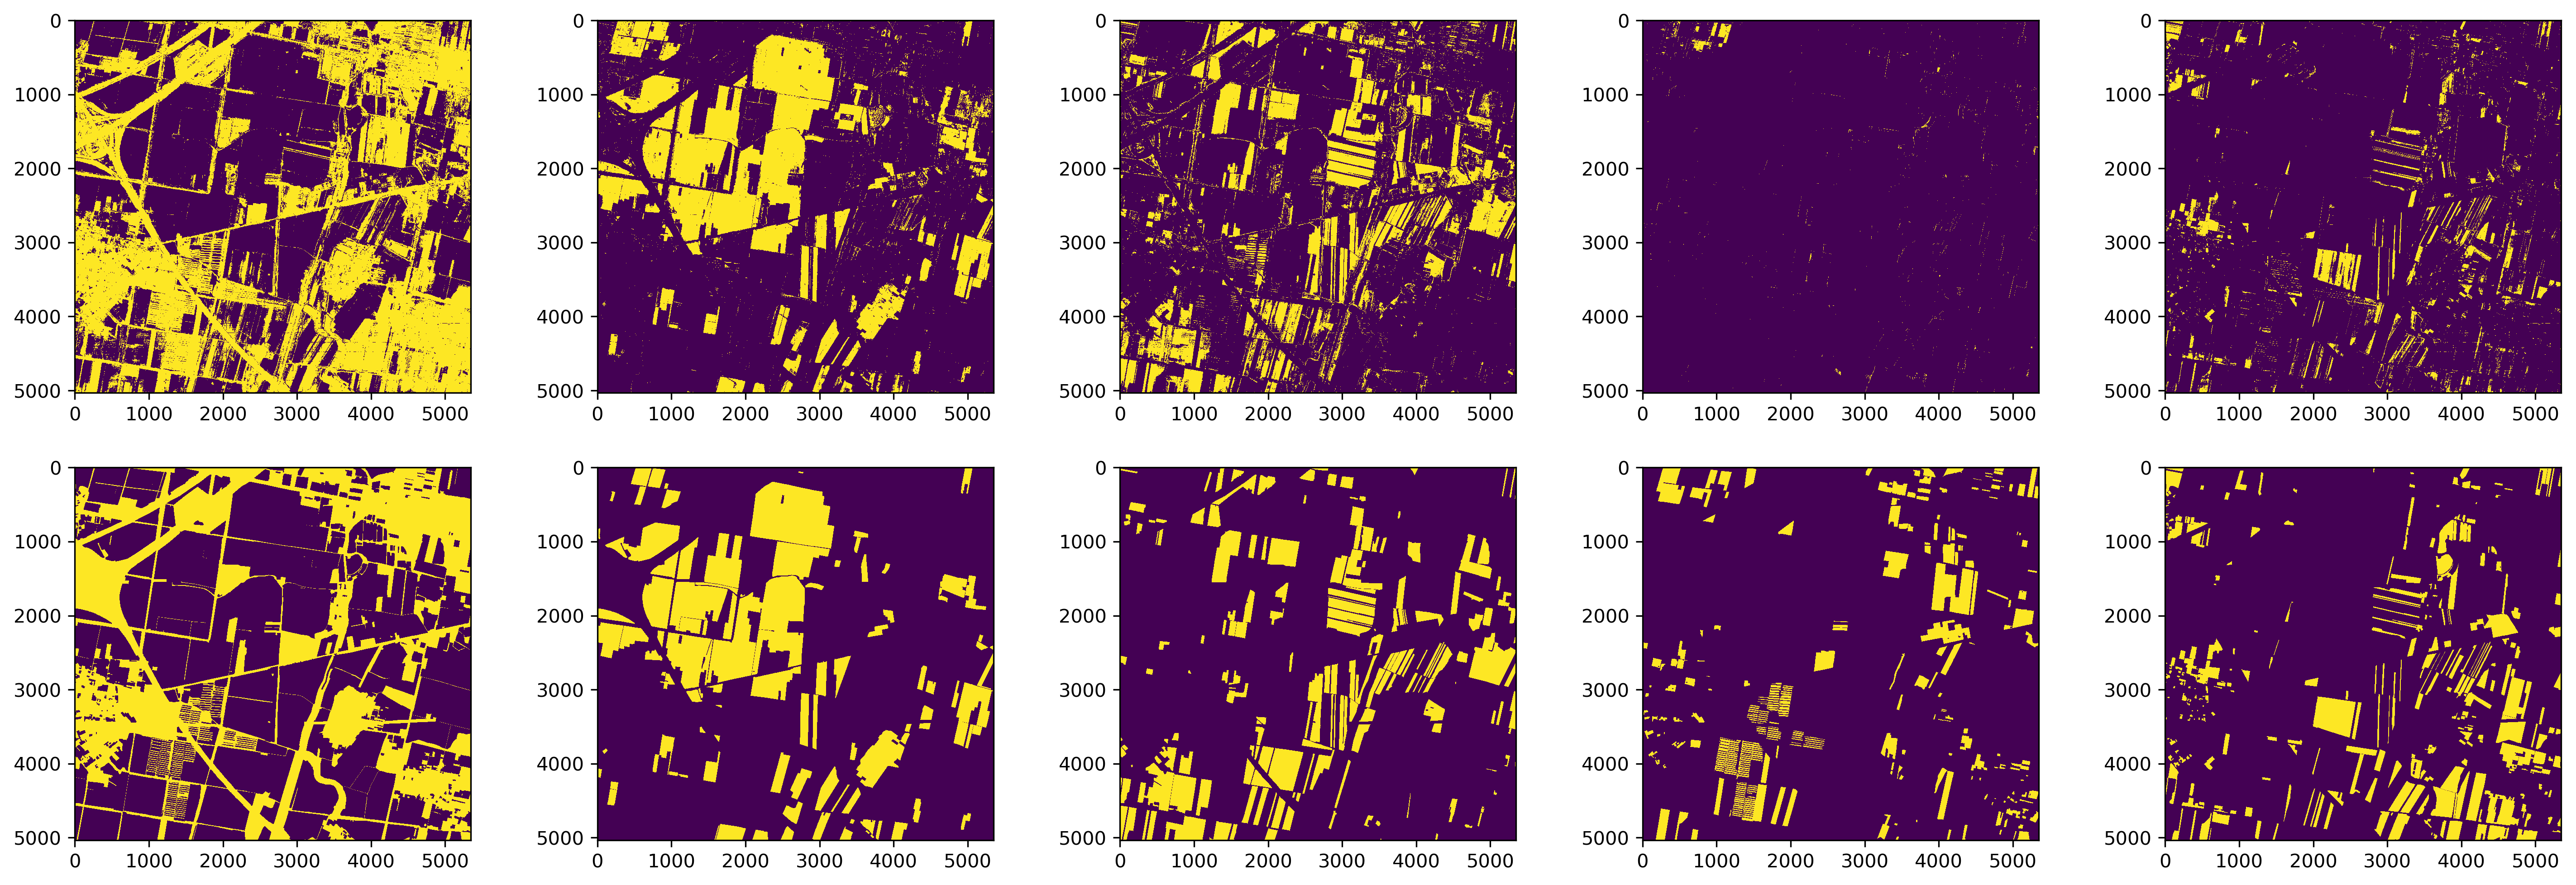

In [3]:
    img_final = torch.reshape(img_final,(num_classes,h,w))
    print(img_final.shape)
    img_per = torch.sigmoid(img_final)
    img_per = torch.argmax(img_per,dim=0)
    img_per = F.one_hot(img_per, 5).numpy()
    testlabel = testlabel.astype(np.int64)
    label_ =  F.one_hot(torch.from_numpy(testlabel), 5).numpy()
    plt.figure(dpi=300,figsize=(24,8))
    for i in range(num_classes):
        plt.subplot(2,num_classes,i+1)
        plt.imshow(img_per[:,:,i])
        plt.subplot(2,num_classes,i+1+num_classes)
        plt.imshow(label_[:,:,i])
    plt.show()